In [2]:
import pandas as pd

df = pd.read_csv("troop_movements.csv")
print(df.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-10-08 13:34:20        1  resistance_soldier           resistance   
1  2024-10-08 13:34:19        2               at-st           resistance   
2  2024-10-08 13:34:18        3             unknown           resistance   
3  2024-10-08 13:34:17        4             unknown           resistance   
4  2024-10-08 13:34:16        5               at-at           resistance   

   location_x  location_y  destination_x  destination_y    homeworld  
0           7           7              3              5   Haruun Kal  
1           4           5              9              2  Aleen Minor  
2           1           7              6              9     Tatooine  
3          10           6              5              4      Sullust  
4           1           2              2              6       Umbara  


In [9]:
count_emp_res_df = df.groupby("empire_or_resistance").size().reset_index(name="count")
count_emp_res_df

,empire_or_resistance,count
0,empire,472
1,resistance,528


In [ ]:
count_char_hw_df = df.groupby("homeworld").size().reset_index(name="count")
count_char_hw_df

In [11]:
count_unit_type_df = df.groupby("unit_type").size().reset_index(name="count")
count_unit_type_df

,unit_type,count
0,at-at,114
1,at-st,127
2,resistance_soldier,133
3,stormtrooper,127
4,tie_fighter,119
5,tie_silencer,131
6,unknown,131
7,x-wing,118


In [14]:
df["is_resistance"] = df["empire_or_resistance"].apply(lambda x: True if x == "resistance" else False)
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-10-08 13:34:20,1,resistance_soldier,resistance,7,7,3,5,Haruun Kal,True
1,2024-10-08 13:34:19,2,at-st,resistance,4,5,9,2,Aleen Minor,True
2,2024-10-08 13:34:18,3,unknown,resistance,1,7,6,9,Tatooine,True
3,2024-10-08 13:34:17,4,unknown,resistance,10,6,5,4,Sullust,True
4,2024-10-08 13:34:16,5,at-at,resistance,1,2,2,6,Umbara,True
...,...,...,...,...,...,...,...,...,...,...
995,2024-10-08 13:17:45,996,tie_fighter,empire,6,1,6,2,Stewjon,False
996,2024-10-08 13:17:44,997,tie_silencer,resistance,10,5,7,2,Glee Anselm,True
997,2024-10-08 13:17:43,998,x-wing,resistance,4,5,10,7,Kashyyyk,True
998,2024-10-08 13:17:42,999,unknown,resistance,6,10,5,9,Trandosha,True


<Axes: xlabel='empire_or_resistance', ylabel='count'>

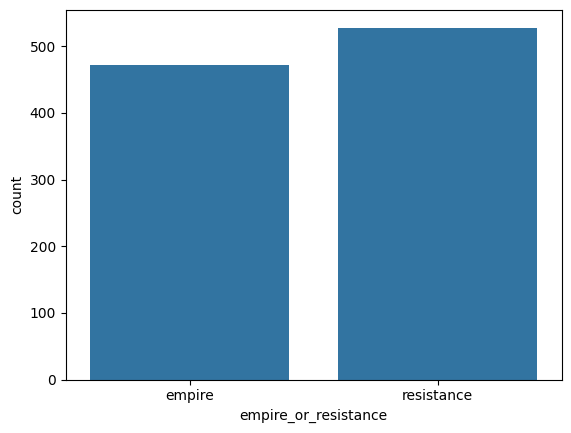

In [26]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.barplot(data=count_emp_res_df, x="empire_or_resistance", y="count") 

In [93]:
y = df["is_resistance"]
X = pd.get_dummies(df[["homeworld","unit_type"]])

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [95]:
from sklearn import tree

clf =  tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [96]:
clf.predict(x_test)

score = clf.score(x_test, y_test)
print(score)

0.53


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_4384\2670635549.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size=8)


[Text(0, 0, 'homeworld_Alderaan'),
 Text(1, 0, 'homeworld_Aleen Minor'),
 Text(2, 0, 'homeworld_Bestine IV'),
 Text(3, 0, 'homeworld_Cerea'),
 Text(4, 0, 'homeworld_Champala'),
 Text(5, 0, 'homeworld_Chandrila'),
 Text(6, 0, 'homeworld_Concord Dawn'),
 Text(7, 0, 'homeworld_Corellia'),
 Text(8, 0, 'homeworld_Dagobah'),
 Text(9, 0, 'homeworld_Dathomir'),
 Text(10, 0, 'homeworld_Dorin'),
 Text(11, 0, 'homeworld_Eriadu'),
 Text(12, 0, 'homeworld_Glee Anselm'),
 Text(13, 0, 'homeworld_Haruun Kal'),
 Text(14, 0, 'homeworld_Iktotch'),
 Text(15, 0, 'homeworld_Iridonia'),
 Text(16, 0, 'homeworld_Kalee'),
 Text(17, 0, 'homeworld_Kashyyyk'),
 Text(18, 0, 'homeworld_Malastare'),
 Text(19, 0, 'homeworld_Mirial'),
 Text(20, 0, 'homeworld_Mon Cala'),
 Text(21, 0, 'homeworld_Muunilinst'),
 Text(22, 0, 'homeworld_Naboo'),
 Text(23, 0, 'homeworld_Ojom'),
 Text(24, 0, 'homeworld_Quermia'),
 Text(25, 0, 'homeworld_Rodia'),
 Text(26, 0, 'homeworld_Ryloth'),
 Text(27, 0, 'homeworld_Serenno'),
 Text(28, 0, 

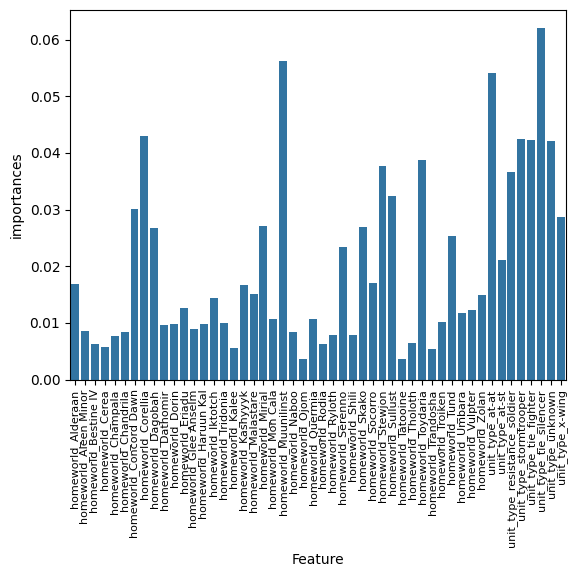

In [97]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, "importances": importances})
plot = sns.barplot(data=feature_importances, x="Feature", y="importances") 
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size=8)



In [98]:
import pickle

file_path = 'gp3.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(clf, file)

In [99]:
new_data = pd.read_csv("troop_movements_1m.csv")

new_data["unit_type"] = new_data["unit_type"].apply(lambda x: "unknown" if x == "invalid_unit" else x)


In [100]:
cols = ['location_x', 'location_y']
new_data.loc[:,cols] = new_data.loc[:,cols].ffill()


In [101]:
%pip install pyarrow

^C
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
%pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/673.0 kB ? eta -:--:--
    --------------------------------------- 10.2/673.0 kB ? eta -:--:--
   - ------------------------------------- 30.7/673.0 kB 325.1 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/673.0 kB 393.8 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/673.0 kB 581.0 kB/s eta 0:00:01
   ---------------------------------------  665.6/673.0 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 673.0/673.0 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------  2.1/2.1 MB 131.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 33.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/179.3 kB ? eta -:--:--
   --------------------------------------- 179.3/179.3 kB 10.6 MB/s eta 0:00:00
Note


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
new_data.to_parquet('troop_movements_1m.parquet', engine='pyarrow') 

In [103]:
with open('gp3.pkl', 'rb') as model_file:
    trained_model = pickle.load(model_file)

In [104]:
data = pd.read_parquet('troop_movements_1m.parquet', engine='pyarrow') 


In [105]:
X = pd.get_dummies(data[["homeworld","unit_type"]])

In [106]:
prediction = trained_model.predict(X)

In [109]:
data["predictions"] = prediction

In [111]:
data

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor,False
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare,True
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno,False
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund,False
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako,False
...,...,...,...,...,...,...,...,...,...
999995,2023-05-03 18:48:56,3553240,tie_fighter,8.0,4.0,8,1,Chandrila,False
999996,2023-05-25 13:45:35,1662636,at-at,0.0,3.0,8,6,Trandosha,False
999997,2023-05-17 12:16:37,2362262,tie_fighter,6.0,8.0,7,9,Kashyyyk,True
999998,2023-03-17 08:04:26,7669749,tie_fighter,9.0,3.0,3,5,Zolan,False
